# Análisis de Eficiencia y Gasto Público en Proyectos de Inversión  
## Colombia (2012–2024)

**Autor:** *Ing. Diego Fuentes*  
**Fecha:** *2025*

---

## 1. Contexto

Este proyecto analiza información pública del **Departamento Nacional de Planeación (DNP)** con
 el objetivo de identificar patrones en la **asignación, ejecución y eficiencia** de los  
 proyectos de inversión pública en Colombia. A través del análisis **sectorial**, **territorial**
y **presupuestal**, se busca evaluar cómo se distribuyen los recursos públicos y detectar **posibles
oportunidades de mejora** en la gestión y planificación de proyectos.

## 2. Objetivo general

Analizar la asignación, ejecución y eficiencia de los proyectos de inversión pública en  Colombia,
con el fin de identificar **patrones sectoriales y territoriales** que permitan 
evaluar el uso de
los recursos públicos.

## 3. Objetivos específicos

- **Analizar la distribución de la inversión pública por sector**,   identificando aquellos con
mayor concentración de recursos y su peso relativo dentro del total de proyectos.

- **Evaluar la eficiencia presupuestal de los proyectos finalizados**,   comparando el valor
aprobado frente al valor ejecutado,   con el fin de identificar la proporción de proyectos  
con **sobrecostos y ejecución eficiente**.

- **Identificar los departamentos con mayor concentración de proyectos**, analizando la distribución
territorial de la inversión pública para detectar posibles **desigualdades o focos de priorización 
regional**.



### 1) Carga del dataset

In [20]:
#Librerias
from pathlib import Path
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.colors as pc
import plotly.graph_objects as go
from plotly.subplots import make_subplots

sns.set_style("whitegrid")
warnings.filterwarnings("ignore")

pd.set_option("display.float_format", lambda x: f"{x:,.2f}")


In [21]:
#CARGA DE DATOS
BASE_DIR = Path.cwd()
DATA_PATH = BASE_DIR / "DNP-proyectos_Colombia.csv"

print("Directorio actual del kernel:")
print(BASE_DIR)

print("\nBuscando archivo en:")
print(DATA_PATH)

if not DATA_PATH.exists():
    raise FileNotFoundError(
        "No se encontró el archivo 'DNP-proyectos_Colombia.csv'. "
        "Colócalo en la carpeta raíz del proyecto."
    )

df = pd.read_csv(DATA_PATH, encoding="utf-8")

print(
    f"\nDataset cargado exitosamente: "
    f"{df.shape[0]:,} filas y {df.shape[1]} columnas."
)

df.head()



Directorio actual del kernel:
c:\Users\diego\OneDrive\Escritorio\Proyecto_Colombia1

Buscando archivo en:
c:\Users\diego\OneDrive\Escritorio\Proyecto_Colombia1\DNP-proyectos_Colombia.csv

Dataset cargado exitosamente: 496,420 filas y 17 columnas.


,Bpin,NombreProyecto,ObjetivoGeneral,EstadoProyecto,Horizonte,Sector,EntidadResponsable,ProgramaPresupuestal,TipoProyecto,PlanDesarrolloNacional,ValorTotalProyecto,ValorVigenteProyecto,ValorObligacionProyecto,ValorPagoProyecto,SubEstadoProyecto,CodigoEntidadResponsable,TotalBeneficiario
0,2019415240011,Desarrollo Del Programa De Transporte Escola...,Garantizar a los menores y los adolescentes d...,En Ejecución,2019-2019,Educación,PalermoHuila,"2201 CALIDAD, COBERTURA Y FORTALECIMIENTO DE L...",T,Todos por un nuevo país (2014-2018),"1,000,000,000.00","1,000,000,000.00",0.00,0.00,"Inactivo (PGN, Territorio)",41524,718.00
1,2024503180038,Estudios Y Diseños Para La Construcción Del C...,Mejorar los índices de calidad de vida de la p...,En Ejecución,2024-2025,Inclusión Social Y Reconciliación,GuamalMeta,4103 INCLUSIÓN SOCIAL Y PRODUCTIVA PARA LA POB...,T,Colombia Potencia Mundial de la Vida (2022-2026),"203,702,324.46","203,702,324.46","50,305,912.36","50,305,912.36","En ejecución (PGN, Territorio)",50318,"2,700.00"
2,2022002700139,Desarrollo De La Dimensión Vida Saludable Y En...,Mejorar las condiciones de atención y protecci...,En Ejecución,2023-2023,Salud Y Protección Social,Sucre,SALUD PÚBLICA,T,"Pacto Por Colombia, Pacto por la Equidad (2019...","370,066,980.00","370,066,980.00","106,499,940.00","106,499,940.00","Inactivo (PGN, Territorio)",70,"981,727.00"
3,2024735550002,Mejoramiento De Las Condiones De Acciones Y Ac...,GTYBY,Formulación,2024-2024,Educación,PlanadasTolima,"2201 CALIDAD, COBERTURA Y FORTALECIMIENTO DE L...",T,Colombia Potencia Mundial de la Vida (2022-2026),"1,000.00",0.00,0.00,0.00,Devuelto a MGA,73555,100.00
4,2024202380105,Desarrollo Y Fomento De La Cultura Local Del M...,Fortalecer la promoción de actividades artísti...,En Ejecución,2024-2024,Cultura,El CopeyCesar,3301 PROMOCIÓN Y ACCESO EFECTIVO A PROCESOS CU...,T,Colombia Potencia Mundial de la Vida (2022-2026),"469,820,299.00","469,820,299.00",0.00,0.00,"Inactivo (PGN, Territorio)",20238,"32,624.00"


In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496420 entries, 0 to 496419
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Bpin                      496420 non-null  object 
 1   NombreProyecto            496420 non-null  object 
 2   ObjetivoGeneral           496395 non-null  object 
 3   EstadoProyecto            496420 non-null  object 
 4   Horizonte                 496420 non-null  object 
 5   Sector                    496420 non-null  object 
 6   EntidadResponsable        492932 non-null  object 
 7   ProgramaPresupuestal      496420 non-null  object 
 8   TipoProyecto              496420 non-null  object 
 9   PlanDesarrolloNacional    492249 non-null  object 
 10  ValorTotalProyecto        496420 non-null  float64
 11  ValorVigenteProyecto      496420 non-null  float64
 12  ValorObligacionProyecto   496420 non-null  float64
 13  ValorPagoProyecto         496420 non-null  f

In [23]:
from pathlib import Path

print("Directorio actual del kernel:")
print(Path.cwd())


Directorio actual del kernel:
c:\Users\diego\OneDrive\Escritorio\Proyecto_Colombia1


### 2) Limpieza de datos

In [24]:
#Eliminacion de columnas que no agregan valor
cols_to_drop = [
    "ObjetivoGeneral",
    "ProgramaPresupuestal",
    "TipoProyecto",
    "SubEstadoProyecto",
    "CodigoEntidadResponsable"
]

df = df.drop(columns=cols_to_drop)



In [25]:

"""Este codigo se hizo para separa la columna Horizonte en dos columnas'Inicio' y 'Fin'"""
# 1) Crear 'Inicio' y 'Fin' desde 'Horizonte' y eliminar 'Horizonte' de una vez
df[['Inicio', 'Fin']] = df.pop('Horizonte').str.split('-', n=1, expand=True)

# (opcional) limpiar espacios
df['Inicio'] = df['Inicio'].str.strip()
df['Fin']    = df['Fin'].str.strip()

# 2) Mover 'Inicio' y 'Fin' para que queden justo antes de 'Sector'
sector_pos = df.columns.get_loc('Sector')
df.insert(sector_pos,     'Inicio', df.pop('Inicio'))
df.insert(sector_pos + 1, 'Fin',    df.pop('Fin'))

display(df.head())



,Bpin,NombreProyecto,EstadoProyecto,Inicio,Fin,Sector,EntidadResponsable,PlanDesarrolloNacional,ValorTotalProyecto,ValorVigenteProyecto,ValorObligacionProyecto,ValorPagoProyecto,TotalBeneficiario
0,2019415240011,Desarrollo Del Programa De Transporte Escola...,En Ejecución,2019,2019,Educación,PalermoHuila,Todos por un nuevo país (2014-2018),"1,000,000,000.00","1,000,000,000.00",0.00,0.00,718.00
1,2024503180038,Estudios Y Diseños Para La Construcción Del C...,En Ejecución,2024,2025,Inclusión Social Y Reconciliación,GuamalMeta,Colombia Potencia Mundial de la Vida (2022-2026),"203,702,324.46","203,702,324.46","50,305,912.36","50,305,912.36","2,700.00"
2,2022002700139,Desarrollo De La Dimensión Vida Saludable Y En...,En Ejecución,2023,2023,Salud Y Protección Social,Sucre,"Pacto Por Colombia, Pacto por la Equidad (2019...","370,066,980.00","370,066,980.00","106,499,940.00","106,499,940.00","981,727.00"
3,2024735550002,Mejoramiento De Las Condiones De Acciones Y Ac...,Formulación,2024,2024,Educación,PlanadasTolima,Colombia Potencia Mundial de la Vida (2022-2026),"1,000.00",0.00,0.00,0.00,100.00
4,2024202380105,Desarrollo Y Fomento De La Cultura Local Del M...,En Ejecución,2024,2024,Cultura,El CopeyCesar,Colombia Potencia Mundial de la Vida (2022-2026),"469,820,299.00","469,820,299.00",0.00,0.00,"32,624.00"


In [26]:
""""Eliminar los duplicados Bpin y conservar los que tengan el año mas reciente"""
# Convertir a datetime y quedarnos solo con el año
df['Fin'] = pd.to_datetime(df['Fin'], errors='coerce').dt.year

# Para cada Bpin, quedarnos con la fila con el año 'Fin' más grande
df_sin_duplicados = df.sort_values('Fin').drop_duplicates(subset='Bpin', keep='last')

# Resetear índice
df_sin_duplicados = df_sin_duplicados.reset_index(drop=True)

In [27]:
df = df.loc[df.groupby('Bpin')['Fin'].idxmax()]

In [28]:

def agrupar_estado(estado):
    if estado in ["Formulación", "Viable", "Aprobado", "No Aprobado", "Desaprobado", "No Viable"]:
        return "Planeación/Evaluación"
    elif estado == "En Ejecución":
        return "Ejecución"
    elif estado == "Terminado":
        return "Finalizado"
    else:
        return "Otro"

df["EstadoGrupo"] = df["EstadoProyecto"].apply(agrupar_estado)

# Ahora sí ver los resultados de la reclasificación
print(df["EstadoGrupo"].value_counts())


EstadoGrupo
Ejecución                255818
Planeación/Evaluación    213503
Finalizado                27027
Name: count, dtype: int64


In [29]:
""""Se elimina todas las filas del Prosperidad para Todos (2010-2014) ya que tienen muy pocos registros a comparancion de los otros planes de desarrollo """
df = df[df['PlanDesarrolloNacional'] != "Prosperidad para Todos (2010-2014)"]
df = df.reset_index(drop=True)
print(df['PlanDesarrolloNacional'].value_counts())


PlanDesarrolloNacional
Pacto Por Colombia, Pacto por la Equidad (2019-2022)    227367
Colombia Potencia Mundial de la Vida (2022-2026)        161193
Todos por un nuevo país (2014-2018)                     103196
Name: count, dtype: int64


In [30]:
""" Tipado para las visualizaciones"""

# 1) Asegurar que Inicio sea año (si tu columna ya viene como 'YYYY' o 'YYYY-MM-DD')
#    - Si ya es 'YYYY' en texto:
df['Inicio'] = pd.to_numeric(df['Inicio'], errors='coerce').astype('Int16')

#    - (Alternativa) Si viene como fecha tipo 'YYYY-MM-DD':
# df['Inicio'] = pd.to_datetime(df['Inicio'], errors='coerce').dt.year.astype('Int16')

# 2) Año Fin a Int16 (nullable)
df['Fin'] = pd.to_numeric(df['Fin'], errors='coerce').astype('Int16')

# 3) Categóricas (ahorra memoria y acelera agrupaciones)
cat_cols = ['EstadoProyecto', 'Sector', 'EntidadResponsable', 'PlanDesarrolloNacional', 'EstadoGrupo']
for c in cat_cols:
    df[c] = df[c].astype('category')

# 4) Si los montos no tienen centavos y querés enteros (si no, dejá float64)
# for c in ['ValorTotalProyecto','ValorVigenteProyecto','ValorObligacionProyecto','ValorPagoProyecto','TotalBeneficiario']:
#     df[c] = pd.to_numeric(df[c], errors='coerce').round(0).astype('Int64')

# 5) (Opcional) ver ahorro de memoria
def mem_mb(x): 
    return x.memory_usage(deep=True).sum() / 1024**2

print("Memoria actual (MB):", round(mem_mb(df), 2))



Memoria actual (MB): 149.24


#   *1)Persistencia de proyectos en fase de planeación a lo largo de los Planes Nacionales de Desarrollo*

El gráfico compara el estado de los proyectos asociados a los tres últimos Planes Nacionales de Desarrollo.
Se observa que, independientemente del periodo, una proporción significativa de proyectos permanece en fase de planeación.
El plan más antiguo presenta mayor porcentaje de proyectos finalizados, lo que sugiere un rezago natural en la ejecución de los planes más recientes.


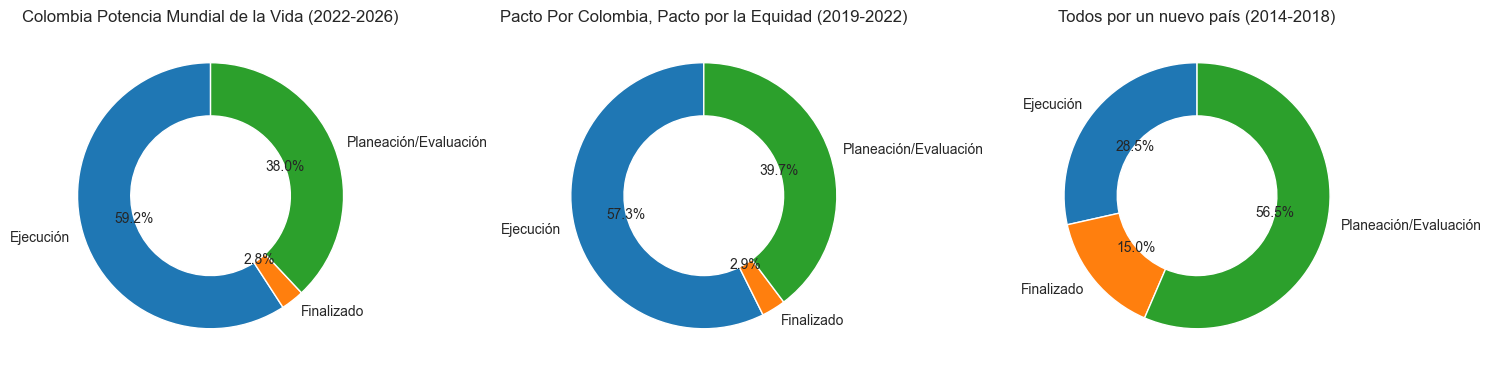

In [31]:
df_group = (df.groupby(['PlanDesarrolloNacional','EstadoGrupo'])['Bpin']
              .count()
              .reset_index()
              .rename(columns={'Bpin':'Cantidad'}))

planes = df_group['PlanDesarrolloNacional'].dropna().unique()

# Crear subplots: 1 fila, N columnas (uno por plan)
fig, axes = plt.subplots(1, len(planes), figsize=(5*len(planes), 6))

if len(planes) == 1:
    axes = [axes]  # cuando es solo un plan, axes no es lista

for ax, plan in zip(axes, planes):
    temp = df_group[df_group['PlanDesarrolloNacional'] == plan]
    wedges, texts, autotexts = ax.pie(
        temp['Cantidad'],
        labels=temp['EstadoGrupo'],
        autopct="%1.1f%%",
        startangle=90,
        wedgeprops=dict(width=0.4)  # convierte el pastel en donut
    )
    ax.set_title(plan)

plt.tight_layout()
plt.show()




### Insight:
Se observa que la proporción de proyectos finalizados es mayor en planes con mayor antigüedad, mientras que los planes más recientes concentran una mayor participación de proyectos en fase de planeación, lo cual es consistente con su horizonte temporal de ejecución.

---


#   *2)  Relación entre inversión pública, cobertura poblacional y volumen de proyectos por sector*
Este gráfico de burbuja analiza la relación entre la inversión pública total, el número de beneficiarios y la cantidad de proyectos ejecutados por sector.
El eje horizontal representa la inversión total (en millones de COP), el eje vertical el total de beneficiarios, y el tamaño de la burbuja indica el número de proyectos.
Ambos ejes se presentan en escala logarítmica para facilitar la comparación entre sectores con magnitudes muy distintas.



In [32]:
# Agrupar y crear el dataframe resumido por sector
Variables_Sector = (
    df.groupby("Sector", as_index=False)
      .agg(
          ValorTotalProyecto_M=("ValorTotalProyecto", lambda x: x.sum() / 1_000_000),
          TotalBeneficiario_M=("TotalBeneficiario", lambda x: x.sum() / 1_000_000),
          CantidadProyectos=("Bpin", "count")
      )
)

# Gráfico burbuja
fig = px.scatter(
    Variables_Sector,
    x="ValorTotalProyecto_M",
    y="TotalBeneficiario_M",
    size="CantidadProyectos",
    color="Sector",
    hover_name="Sector",
    title="RELACIÓN INVERSIÓN - BENEFICIARIOS - CANTIDAD DE PROYECTOS",
    template="plotly_white",
    log_x=True,
    log_y=True,
    size_max=60
)

fig.update_xaxes(title="Inversión total (millones COP, log)")
fig.update_yaxes(title="Total beneficiarios (millones, log)")
fig.show()


## Insights
   *    Sectores como *Congreso de la República* y *Fiscalía* concentran niveles elevados de inversión total, pero presentan una cobertura relativamente baja en términos de beneficiarios. Esto sugiere que los recursos se destinan principalmente a proyectos de fortalecimiento institucional, infraestructura administrativa o modernización interna, cuyo impacto no se refleja directamente en el número de beneficiarios atendidos.

   *    En contraste, sectores como *Educación* y *Salud* logran una alta cantidad de beneficiarios con niveles de inversión comparativamente menores, lo que indica una mayor eficiencia relativa en términos de cobertura poblacional por recurso invertido.

   *   El tamaño de las burbujas evidencia diferencias en la estrategia de ejecución entre sectores. Por ejemplo, *Gobierno Territorial* y *Educación* concentran un alto número de proyectos, lo que sugiere una ejecución descentralizada y de menor escala, mientras que sectores como *Congreso de la República* concentran grandes montos en un número reducido de iniciativas.

   * Los sectores como *Transporte y Salud Y Protección Social tienen grandes volumenes de recursos y proyectos, la naturaleza de su impacto es distinta. Mientras Transporte prioriza inversiones de alto costo con beneficios estructurales y de largo plazo, Salud y Protección Social muestra una mayor eficiencia en términos de beneficiarios atendidos por recurso invertido.

   ---


#   *3)  Comparación entre Inversión Total y Eficiencia en Proyectos Públicos por Sector*

Este análisis presenta una comparación entre dos dimensiones clave del gasto público por sector.

El gráfico de la izquierda muestra los cinco sectores que concentran la mayor inversión total en proyectos, mientras que el gráfico de la derecha presenta los cinco sectores con mayor eficiencia, medida como el número de beneficiarios por cada millón de pesos invertido.

El objetivo de esta comparación es evaluar si los sectores que reciben mayores recursos públicos son también aquellos que generan un mayor impacto social relativo.


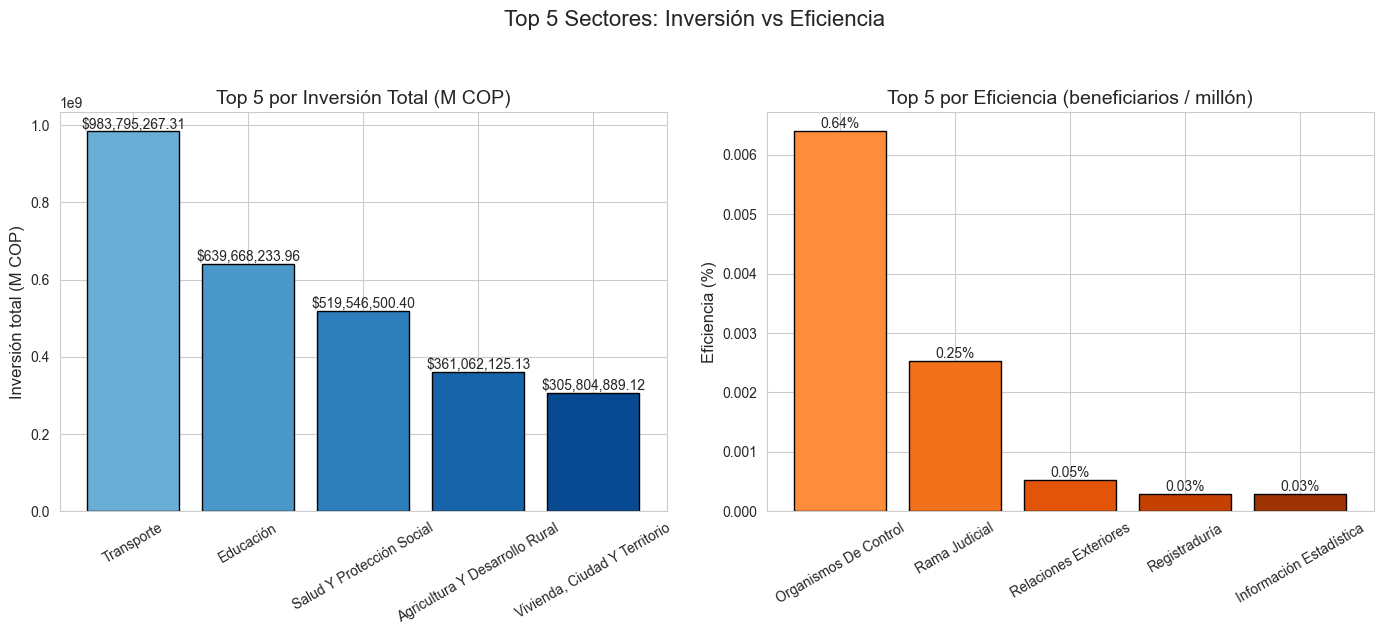

In [33]:

tabla_resumen = Variables_Sector[[
    "Sector", "ValorTotalProyecto_M", "TotalBeneficiario_M", "CantidadProyectos"
]].copy()

tabla_resumen["Eficiencia_Beneficiarios_x_Millon"] = (
    tabla_resumen["TotalBeneficiario_M"] / tabla_resumen["ValorTotalProyecto_M"]
)

# Top 5
top5_inv = (
    tabla_resumen.nlargest(5, "ValorTotalProyecto_M")
    .sort_values("ValorTotalProyecto_M", ascending=False)
)

top5_eff = (
    tabla_resumen.nlargest(5, "Eficiencia_Beneficiarios_x_Millon")
    .sort_values("Eficiencia_Beneficiarios_x_Millon", ascending=False)
)

# --- Crear subplots ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))


# Gráfico 1: Inversión

colors_inv = plt.cm.Blues(np.linspace(0.5, 0.9, len(top5_inv)))

bars1 = axes[0].bar(
    top5_inv["Sector"],
    top5_inv["ValorTotalProyecto_M"],
    color=colors_inv,
    edgecolor="black"
)

axes[0].set_title("Top 5 por Inversión Total (M COP)", fontsize=14)
axes[0].set_ylabel("Inversión total (M COP)", fontsize=12)
axes[0].tick_params(axis="x", rotation=30)

# Etiquetas $
for bar in bars1:
    height = bar.get_height()
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"${height:,.2f}",
        ha="center",
        va="bottom",
        fontsize=10
    )


# Gráfico 2: Eficiencia

colors_eff = plt.cm.Oranges(np.linspace(0.5, 0.9, len(top5_eff)))

bars2 = axes[1].bar(
    top5_eff["Sector"],
    top5_eff["Eficiencia_Beneficiarios_x_Millon"],
    color=colors_eff,
    edgecolor="black"
)

axes[1].set_title("Top 5 por Eficiencia (beneficiarios / millón)", fontsize=14)
axes[1].set_ylabel("Eficiencia (%)", fontsize=12)
axes[1].tick_params(axis="x", rotation=30)

# Etiquetas %
for bar in bars2:
    height = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height * 100:.2f}%",
        ha="center",
        va="bottom",
        fontsize=10
    )

fig.suptitle(
    "Top 5 Sectores: Inversión vs Eficiencia",
    fontsize=16,
    y=1.05
)

plt.tight_layout()
plt.show()


## Insights

• Existe una concentración significativa del presupuesto en sectores de alto costo, como Transporte y Salud, cuyo impacto se materializa principalmente en el largo plazo.

• Algunos sectores con menor inversión logran una mayor eficiencia relativa, lo que indica oportunidades de optimización y buenas prácticas en la gestión de recursos.

• Evaluar únicamente la inversión total puede llevar a conclusiones incompletas; la eficiencia permite complementar el análisis del desempeño del gasto público.

---


#    4)*DISTRIBUCIÓN DE PROYECTOS POR ESTADO*
Gráfico circular permite evienciar la proporción de proyectos públicos según su estado actual dentro del ciclo de vida: planeación/evaluación, ejecución y finalizado.

Cada segmento representa el porcentaje de proyectos que se encuentran en una etapa específica, permitiendo entender el grado de avance general del portafolio de proyectos analizado.

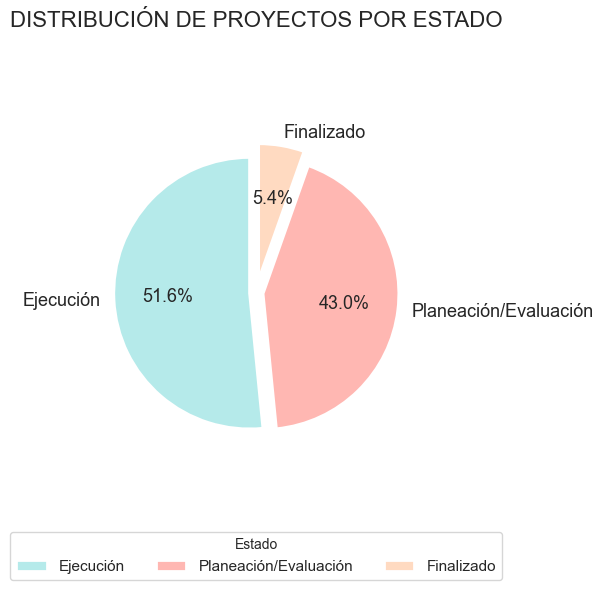

In [34]:
# Conteo de proyectos por EstadoGrupo
conteo = df["EstadoGrupo"].value_counts()

labels = conteo.index
values = conteo.values

# Colores equivalentes a los de Plotly
colors = {
    "Ejecución": "#B5EAEA",
    "Planeación/Evaluación": "#FFB7B2",
    "Finalizado": "#FFDAC1"
}

color_list = [colors[label] for label in labels]

# Separación de sectores (explode)
explode = [0.05, 0.05, 0.1]

# Crear figura
fig, ax = plt.subplots(figsize=(6,6))

ax.pie(
    values,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    colors=color_list,
    explode=explode,
    textprops={"fontsize": 13},
    wedgeprops={"edgecolor": "white", "linewidth": 2}
)

# Título
ax.set_title(
    "DISTRIBUCIÓN DE PROYECTOS POR ESTADO",
    fontsize=16,
    pad=20
)

# Mantener proporción circular
ax.axis("equal")

# Leyenda inferior
plt.legend(
    labels,
    title="Estado",
    loc="lower center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=3,
    fontsize=11
)

plt.tight_layout()
plt.show()


###    Insight
Predominio de proyectos activos: Más del 94% de los proyectos se encuentran en planeación o ejecución, lo que indica un portafolio mayoritariamente en desarrollo.

Bajo cierre de proyectos: Solo el 5.4% de los proyectos han sido finalizados, lo que sugiere ciclos de ejecución prolongados o acumulación histórica de proyectos abiertos.

Alta carga de gestión: La concentración de proyectos en ejecución implica una elevada demanda de seguimiento técnico y control presupuestal.

---

#   *5)Cumplimiento presupuestal de proyectos finalizados*
Este gráfico muestra la distribución de los proyectos finalizados según su cumplimiento presupuestal. 
Se clasifica cada proyecto en función de si el valor ejecutado se mantuvo dentro del presupuesto aprobado o si presentó sobrecostos.
El análisis permite evaluar el grado de control financiero en la ejecución de los proyectos, sin considerar aún el impacto o los resultados obtenidos.


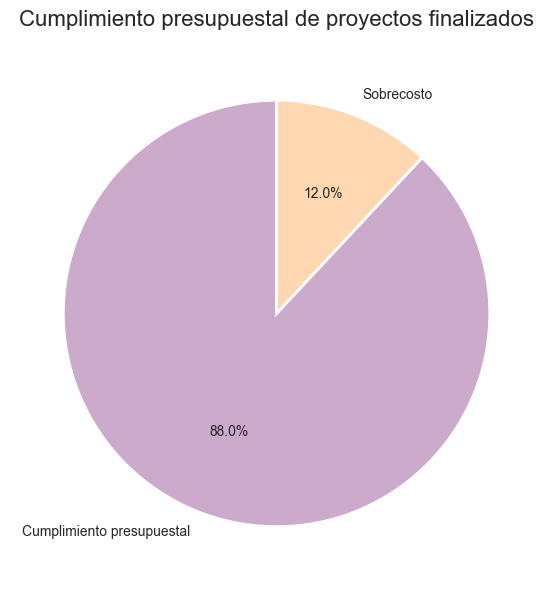

In [47]:
df_finalizado = df[df["EstadoGrupo"] == "Finalizado"].copy()

df_finalizado["CumplimientoPresupuestal"] = np.where(
    df_finalizado["ValorTotalProyecto"] <= df_finalizado["ValorVigenteProyecto"],
    "Cumplimiento presupuestal",
    "Sobrecosto"
)


conteo = (
    df_finalizado["CumplimientoPresupuestal"]
    .value_counts()
    .rename_axis("Estado")
    .reset_index(name="Cantidad")
)


colores = ["#CBAACB", "#FFD8B1"]

fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(
    conteo["Cantidad"],
    labels=conteo["Estado"],
    autopct="%1.1f%%",
    startangle=90,
    colors=colores,
    wedgeprops=dict(edgecolor="white", linewidth=2)
)

ax.set_title(
    "Cumplimiento presupuestal de proyectos finalizados",
    fontsize=16,
    pad=15
)

plt.tight_layout()
plt.show()



### Insight
La mayoría de los proyectos finalizados se ejecutaron dentro del presupuesto aprobado, lo que sugiere un adecuado control del gasto público. 
Sin embargo, la presencia de proyectos con sobrecostos evidencia oportunidades de mejora en los procesos de planeación y seguimiento financiero.


#  *6)CANTIDAD DE PROYECTOS SEGÚN SU HORIZONTE DE EJECUCIÓN DE LOS PROYECTOS YA FINALIZADOS*

El gráfico muestra que la gran mayoría de los proyectos se concentran en el corto plazo (1-3 años), sumando un total de 19,541 iniciativas. A medida que el tiempo de ejecución aumenta hacia los rangos medio (4-10 años) y largo (>10 años).

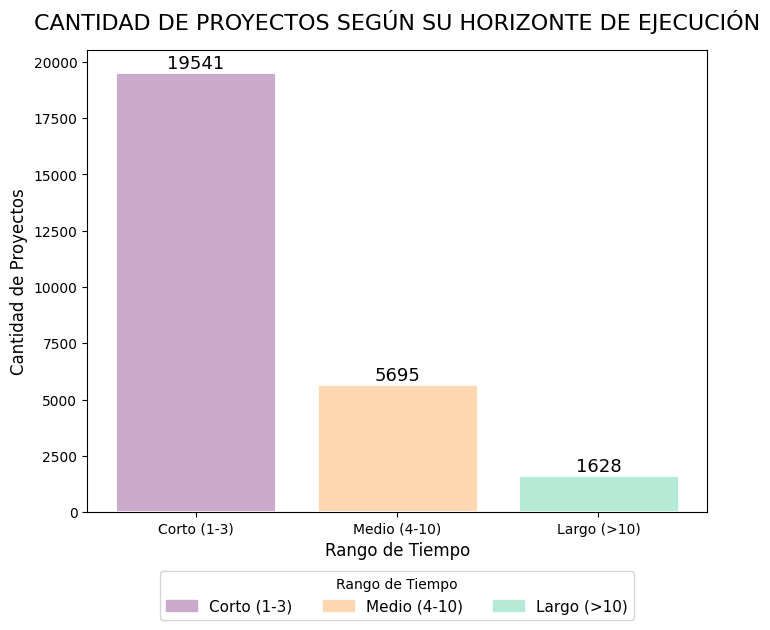

In [ ]:
# DATOS

proyectos_rango = (
    df_finalizado["RangoTiempo"]
    .value_counts()
    .sort_index()
    .reset_index()
)

proyectos_rango.columns = ["RangoTiempo", "Cantidad"]

# Colores 
colores_tiernos_rango = {
    "Corto (1-3)": "#CBAACB",   # lavanda
    "Medio (4-10)": "#FFD8B1", # durazno
    "Largo (>10)": "#B5EAD7"   # menta
}

colors = [colores_tiernos_rango[r] for r in proyectos_rango["RangoTiempo"]]

# GRÁFICO
fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(
    proyectos_rango["RangoTiempo"],
    proyectos_rango["Cantidad"],
    color=colors,
    edgecolor="white",
    linewidth=2
)

# Etiquetas de valor arriba de cada barra
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height)}",
        ha="center",
        va="bottom",
        fontsize=13
    )

# Títulos y etiquetas
ax.set_title(
    "CANTIDAD DE PROYECTOS SEGÚN SU HORIZONTE DE EJECUCIÓN",
    fontsize=16,
    pad=15
)
ax.set_xlabel("Rango de Tiempo", fontsize=12)
ax.set_ylabel("Cantidad de Proyectos", fontsize=12)

# Leyenda inferior (horizontal)
handles = [
    plt.Rectangle((0, 0), 1, 1, color=colores_tiernos_rango[key])
    for key in colores_tiernos_rango
]

ax.legend(
    handles,
    colores_tiernos_rango.keys(),
    title="Rango de Tiempo",
    loc="lower center",
    bbox_to_anchor=(0.5, -0.25),
    ncol=3,
    fontsize=11
)


## INSIGHT

   *    Enfoque en resultados rápidos: La cartera está sumamente cargada hacia la inmediatez, ya que el 72% de los proyectos se resuelven en menos de 3 años, lo que facilita la agilidad pero podría descuidar la visión estratégica de futuro.

   *    Escasez de proyectos estructurales: Solo 6 de cada 100 proyectos son de largo plazo; esto indica que existen muy pocas iniciativas de gran envergadura o alta complejidad que transformen la organización a más de una década.

   ---

# *7)   Comparación de Sectores – Proyectos Finalizados*
Estos gráficos comparan el desempeño de diversos sectores en proyectos finalizados, enfocándose principalmente en Transporte, Vivienda, Educación, Deporte, Ambiente, Ciencia y Tecnología, Agricultura y Salud. A través de tres métricas clave—cantidad de proyectos, inversión total en billones de pesos (B COP) y número de beneficiarios—se observa cómo la gestión se distribuye de forma desigual: mientras algunos sectores ejecutan un volumen masivo de obras pequeñas, otros concentran grandes capitales o logran un impacto social más amplio en términos de población alcanzada.


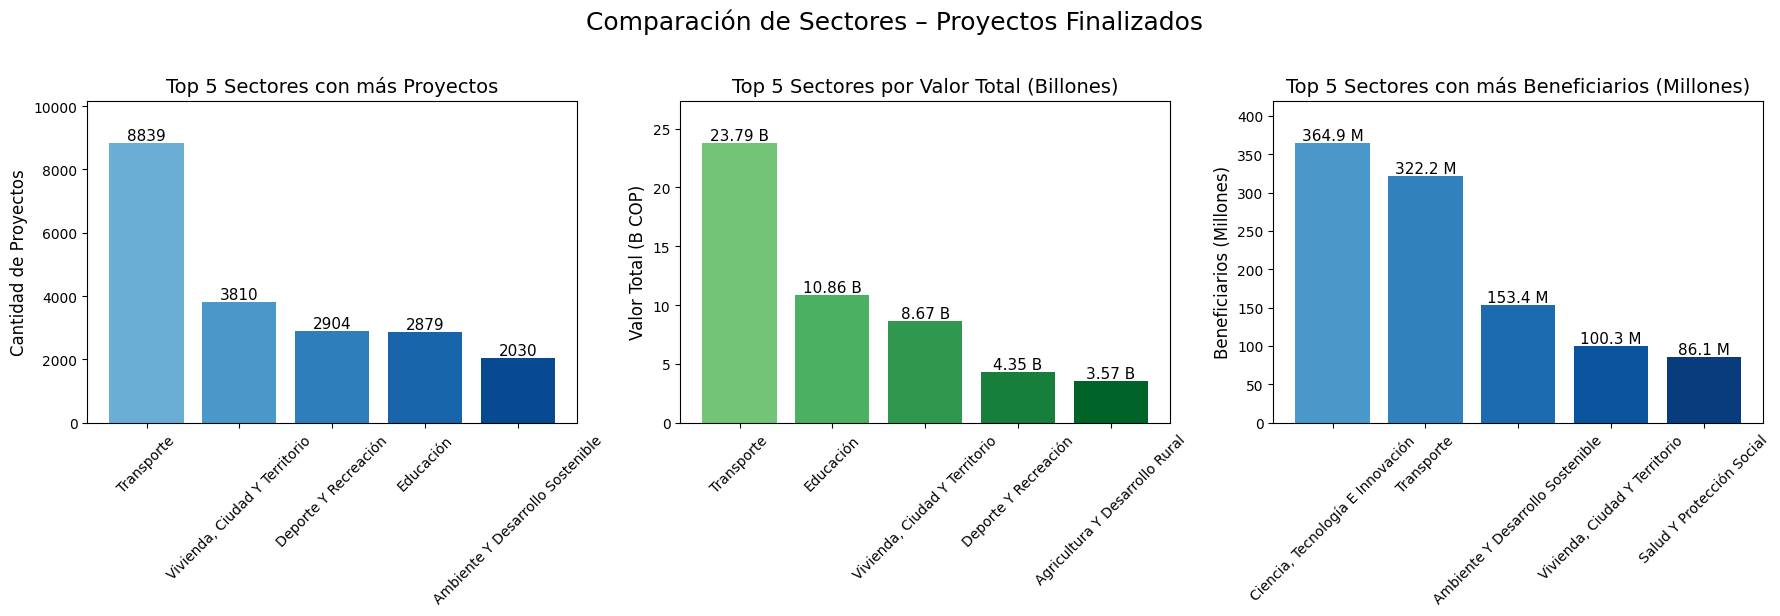

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))


# 1) TOP 5 POR PROYECTOS

colors_proj = plt.cm.Blues(np.linspace(0.5, 0.9, len(top5_proyectos)))

bars1 = axes[0].bar(
    top5_proyectos.index,
    top5_proyectos.values,
    color=colors_proj
)

axes[0].set_title("Top 5 Sectores con más Proyectos", fontsize=14)
axes[0].set_ylabel("Cantidad de Proyectos", fontsize=12)
axes[0].tick_params(axis="x", rotation=45)

for bar in bars1:
    h = bar.get_height()
    axes[0].text(
        bar.get_x() + bar.get_width()/2,
        h,
        f"{int(h)}",
        ha="center",
        va="bottom",
        fontsize=11
    )

axes[0].set_ylim(0, top5_proyectos.max() * 1.15)



# 2) TOP 5 POR VALOR (B)

colors_val = plt.cm.Greens(np.linspace(0.5, 0.9, len(top5_valor)))

bars2 = axes[1].bar(
    top5_valor.index,
    top5_valor.values,
    color=colors_val
)

axes[1].set_title("Top 5 Sectores por Valor Total (Billones)", fontsize=14)
axes[1].set_ylabel("Valor Total (B COP)", fontsize=12)
axes[1].tick_params(axis="x", rotation=45)

for bar in bars2:
    h = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width()/2,
        h,
        f"{h:.2f} B",
        ha="center",
        va="bottom",
        fontsize=11
    )

axes[1].set_ylim(0, top5_valor.max() * 1.15)



# 3) TOP 5 POR BENEFICIARIOS

colors_benef = plt.cm.Blues(np.linspace(0.6, 0.95, len(top5_benef)))

bars3 = axes[2].bar(
    top5_benef.index,
    top5_benef.values,
    color=colors_benef
)

axes[2].set_title("Top 5 Sectores con más Beneficiarios (Millones)", fontsize=14)
axes[2].set_ylabel("Beneficiarios (Millones)", fontsize=12)
axes[2].tick_params(axis="x", rotation=45)

for bar in bars3:
    h = bar.get_height()
    axes[2].text(
        bar.get_x() + bar.get_width()/2,
        h,
        f"{h:.1f} M",
        ha="center",
        va="bottom",
        fontsize=11
    )

axes[2].set_ylim(0, top5_benef.max() * 1.15)



# TÍTULO GENERAL

fig.suptitle(
    "Comparación de Sectores – Proyectos Finalizados",
    fontsize=18,
    y=1.02
)

plt.tight_layout()
plt.show()


## INSIGHTS
 *  Dominio Operativo: El sector Transporte es el líder absoluto en ejecución, concentrando la mayor cantidad de proyectos (8,839) y el mayor presupuesto (23.79 B), lo que lo consolida como el motor principal de la infraestructura física.

 *  Eficiencia de Inversión: El sector Educación destaca por su eficiencia financiera, ya que con menos de la mitad del presupuesto de Transporte (10.86 B), logra posicionarse como el segundo sector con mayor inversión total.

 *  Impacto Masivo: El sector Ciencia, Tecnología e Innovación es el más eficiente en cobertura humana, pues a pesar de no liderar en presupuesto ni en número de obras, logra impactar a la mayor cantidad de personas con 364.9 millones de beneficiarios.

 ---

In [ ]:
import re

departamentos = [
    "Amazonas","Antioquia","Arauca","Atlántico","Bolívar","Boyacá","Caldas",
    "Caquetá","Casanare","Cauca","Cesar","Chocó","Córdoba","Cundinamarca",
    "Guainía","Guaviare","Huila","La Guajira","Magdalena","Meta","Nariño",
    "Norte de Santander","Putumayo","Quindío","Risaralda","San Andrés",
    "Santander","Sucre","Tolima","Valle del Cauca","Vaupés","Vichada",
    "Bogotá", "Bogotá D.C.", "Distrito Capital"
]


In [ ]:
def extraer_departamento(entidad):
    if pd.isna(entidad):
        return None
    
    entidad = entidad.upper()
    
    for depto in departamentos:
        if depto.upper() in entidad:
            # Normalizar Bogotá
            if depto in ["Bogotá D.C.", "Distrito Capital"]:
                return "Bogotá"
            return depto
    
    return None

df["Departamento"] = df["EntidadResponsable"].apply(extraer_departamento)


#   DEPARTAMENTOS CON MAS PROYECTOS EN LAS BASE DE DATOS

In [ ]:
df["Departamento"].value_counts().head(15)


Departamento
Cauca           48779
Antioquia       45054
Cundinamarca    37587
Santander       36277
Boyacá          29712
Córdoba         23804
Bolívar         20920
Nariño          20618
Huila           18576
Sucre           18355
Putumayo        16636
Meta            15476
Cesar           15449
Magdalena       13952
Tolima          13694
Name: count, dtype: int64